### 면적 그래프 

면적 그래프(area plot)는 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색이 입혀진다. 색의 투명도(alpha)는 기본값 0.5로 투과되어 보인다.(투명도:0~1).    

선 그래프를 그리는 plot()메소드에 *kind='area'*옵션 사용   
그래프를 누적할지 여부를 설정할 수 있는데, 기본값은 stacked=True옵션이다. 각 열의 선그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현된다. 따라서, 면적 그래프를 선 그래프를 확장한 개념으로 누적 선 그래프(stacked line plot)라고 부르기도 한다.   

stacked = False 옵션을 지정하면 각 열의 선 그래프들이 누적되지 않고 서로 겹치도록 표시된다. 선 그래프를 동일한 화면에 여러 개를 그린 것과 같은 결과가 된다.   



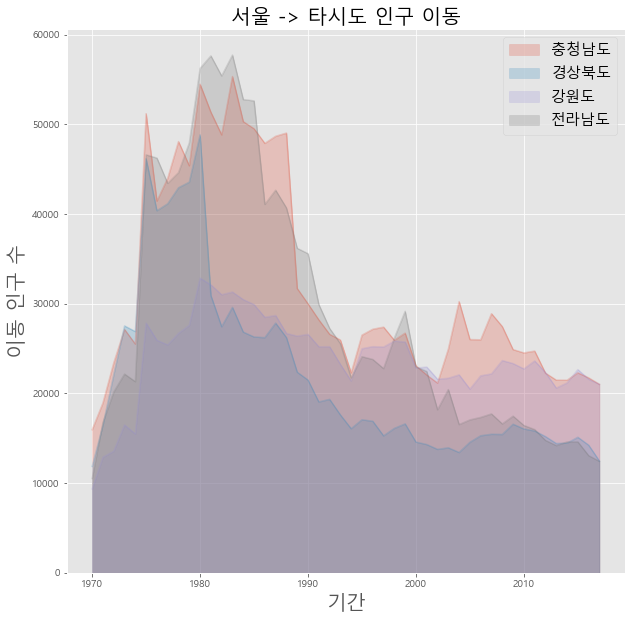

In [16]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', na_values=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.24, figsize=(10,10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()  # 변경사항 저장하고 그래프 출력

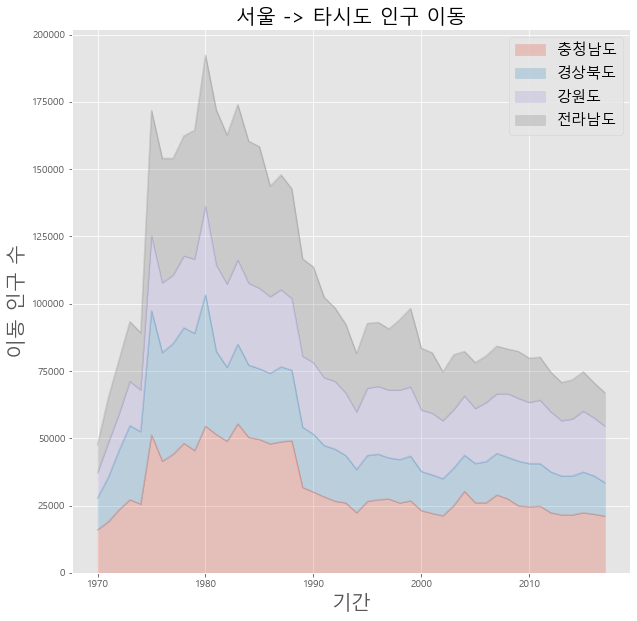

In [18]:
# 면적 그래프 그리기(stacked=True)

# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', na_values=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot') 

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 그리기
df_4.plot(kind='area', stacked=True, alpha=0.24, figsize=(10,10))

plt.title('서울 -> 타시도 인구 이동', size=20)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()  # 변경사항 저장하고 그래프 출력

<class 'matplotlib.axes._subplots.AxesSubplot'>


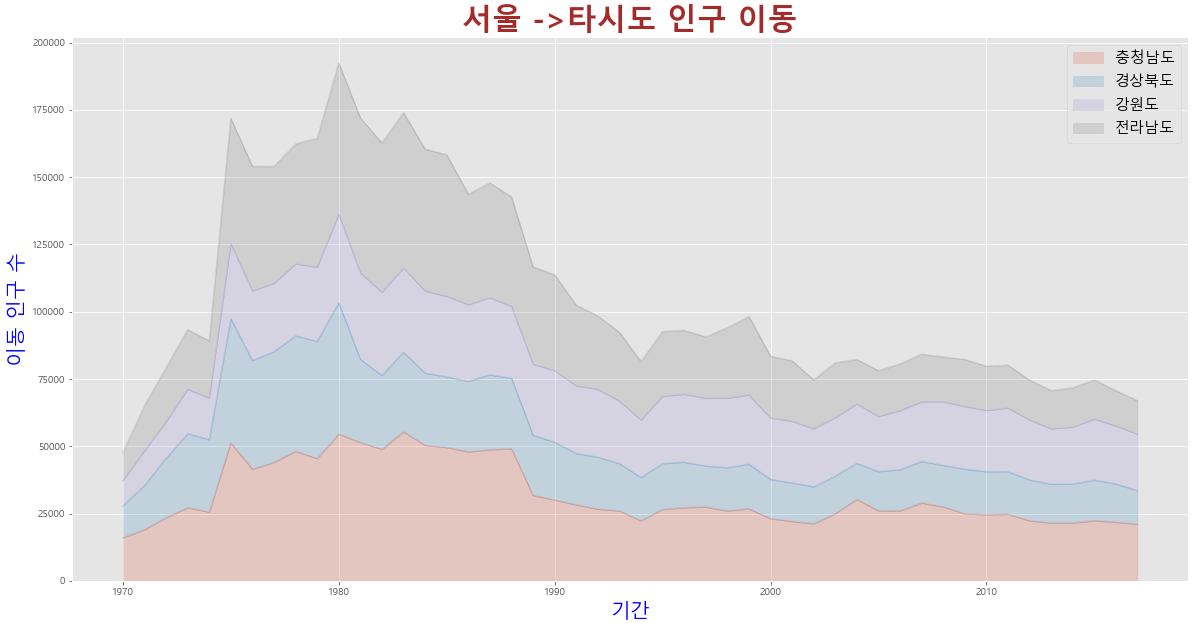

In [30]:
# axes 객체 속성 변경하기 
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', na_values=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도','경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정 
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 면적 그래프 axe 객체 생성 
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# ax 객체 설정 변경 
ax.set_title('서울 ->타시도 인구 이동', size=30, color='brown', weight='bold' )
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

### 막대 그래프 

데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현. 
1. 세로형 막대그래프 
2. 가로형 막대그래프 

세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. 즉 시계열 데이터를 표현하는데 적합.

> plot(kind='bar') 

막대 색상을 다르게 표현함

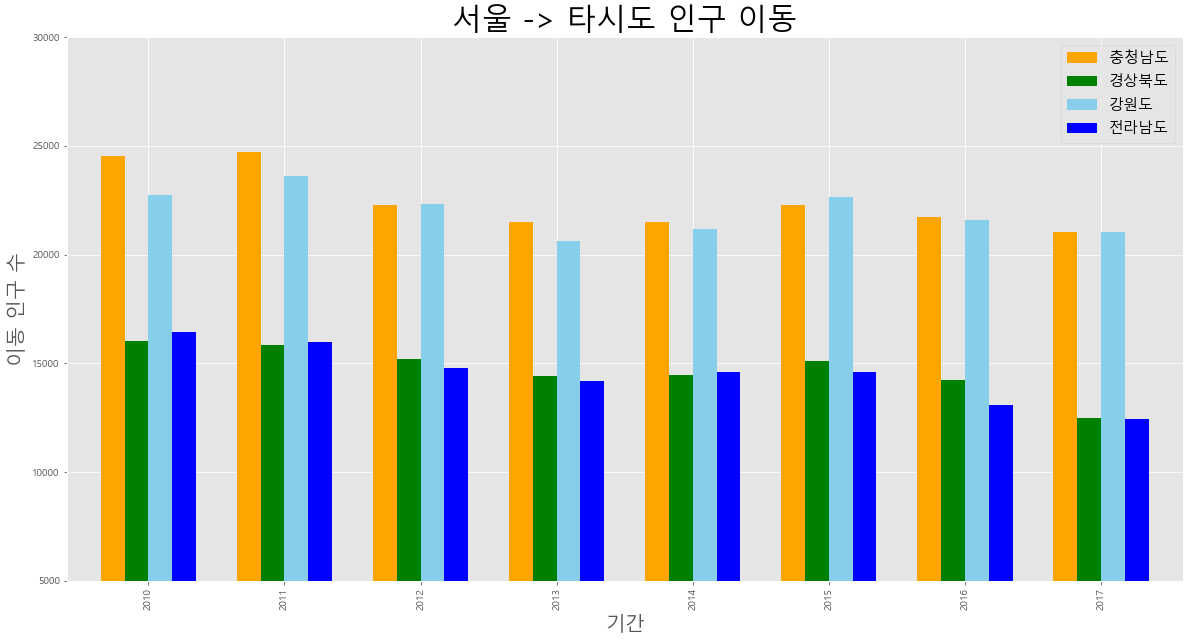

In [34]:
import pandas as pd
import matplotlib.pyplot as plt 


from matplotlib import font_manager, rc
font_path = './malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./시도별 전출입 인구수.xlsx', na_values=0, header=0)

# '전출지별'에서 누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리 
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop('전출지별', axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지',inplace=True)

# 서울에서 '충청남도', '경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use('ggplot')

# 데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

# 막대 그래프 그리기 
df_4.plot(kind='bar', figsize=(20,10), width=0.7,
         color=['orange', 'green','skyblue', 'blue'])

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000, 30000)
plt.legend(loc='best', fontsize=15)

plt.show()

### 가로형 막대 그래프 

가로형 막대 그래프는 각 변수 사이 값의 크기 차이를 설명하는데 적합하다. plot()메소드의 옵션으로 kind='barh'를 입력한다.

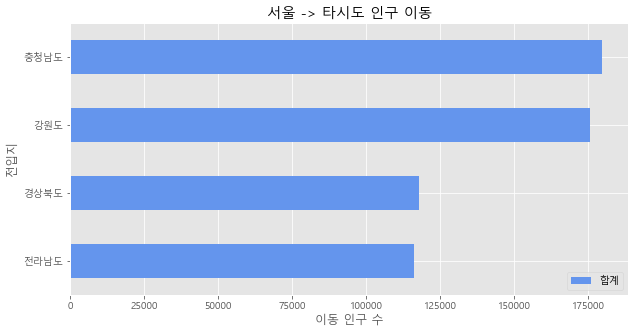

In [38]:
import pandas as pd
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_path = "./malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', na_values=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리 
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 인구 데이터 값만 선택 
col_years = list(map(str, range(2010, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]

# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가 
df_4['합계'] = df_4.sum(axis=1)

# 가장 큰 값부터 정렬 
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

# 스타일 서식 지정 
plt.style.use('ggplot')

# 수평 막대 그래프 그리기
df_total.plot(kind='barh', color='cornflowerblue', width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()